In [3]:
import pandas as pd 
import matplotlib as mpl 
import numpy as np 
import matplotlib.pyplot as plt 
import datetime
from datetime import timezone
%matplotlib inline

In [4]:
# BGEIDSC = pd.read_csv('data/BGEIDSC.EF2EFFP.csv')
TchData = pd.read_csv('data/BGETCHDATA.PTCHTRANH.csv')
QCPerformanceExtracts = pd.read_csv('data/Extranet2.QCPerformanceExtracts.csv')
# IBGEFILE = pd.read_csv('data/IBGEFILE.UNITS.csv')
# ExactFuelEvents = pd.read_csv('data/Extranet2.ExactFuelEvents.csv')
# ExactFuelTankLevels = pd.read_csv('data/Extranet2.ExactFuelTankLevels.csv')

In [3]:
TchData.head()

,TRNID,TRNDAT,TRNTIM,TRNTS#,TRNTSN,TRNSTC,TRNST,TRNDRI,TRNUNT,TRNPI1,...,TRNPI2,TRNPQ2,TRNPI3,TRNPQ3,TRNPI4,TRNPQ4,TRNPI5,TRNPQ5,TRNPI6,TRNPQ6
0,42574765,20170101,20,520277,FLYING J VANDALIA 97,VANDALIA,OH,ULAL,1564,SCLE,...,,0.00,,0.0,,0.0,,0.0,,0
1,42575331,20170101,48,516202,PILOT NEW BRAUNFELS 330,NEW BRAUNFELS,TX,MANRI,1584,ULSD,...,DEFD,7.71,CADV,1.0,,0.0,,0.0,,0
2,42578678,20170101,134,516277,PILOT 421,DALTON,GA,RUSR,1713,ULSD,...,DEFD,4.12,,0.0,,0.0,,0.0,,0
3,42578722,20170101,137,231100,FJ-BRUNSWICK 627,BRUNSWICK,GA,FOSJA,1711,ULSD,...,,0.00,,0.0,,0.0,,0.0,,0
4,42579695,20170101,302,523050,BIG G EXPRESS TERMINAL,GLADEVILLE,TN,HICWIL,1837,ULSD,...,,0.00,,0.0,,0.0,,0.0,,0


In [36]:
# ExactFuelEvents.head()

In [37]:
# ExactFuelEvents.groupby('DriverID').count()

In [38]:
# ExactFuelTankLevels.head()

In [10]:
# ExactFuelEvents['EventTimeStamp'] = pd.to_datetime(ExactFuelEvents['EventTimeStamp'])

In [42]:
# fuel_odo_df = pd.read_csv('data/fuel_odo_use_2.csv')
# fuel_odo_df.sort_values('odo_change', ascending=False)
# fuel_odo_df.dropna(subset=['min_odo','max_odo','odo_change'],inplace=True)

In [8]:
# fuel_odo_df.sort_values('odo_change', ascending=False)

In [36]:
# legit_odo = fuel_odo_df['odo_change'] < 150000

In [9]:
# legit_odo_df = fuel_odo_df[legit_odo]
# legit_odo_df.sort_values('odo_change',ascending=False)

In [11]:
# legit_odo_df['percent_possible'] = legit_odo_df['odo_change'] / 150000 *100

In [ ]:
# legit_odo_df.sort_values('min_odo', ascending=True)

In [39]:
# BGEIDSC.head()

In [93]:
QCPerformanceExtracts = pd.read_csv('data/Extranet2.QCPerformanceExtracts.csv',usecols=['EquipmentID',
                                                                                       'DataStartTimeStamp',
                                                                                        'DataEndTimeStamp',
#                                                                                         'EventTimeStamp',
#                                                                                         'LocationTimeStamp',
                                                                                       'DriverID',
                                                                                        'Driver2ID',
                                                                                        'TotalFuelUsed',
                                                                                        'Distance',
                                                                                        'DriveTime'
                                                                                       ])
QCPerformanceExtracts.head()  #(['EquipmentID','DriverID']).count()

,EquipmentID,DriverID,Driver2ID,DataStartTimeStamp,DataEndTimeStamp,Distance,DriveTime,TotalFuelUsed
0,1995,LYNS,NaN,2016-12-23 16:09:00.000,2017-01-01 07:29:00.000,0,3,0.3
1,1995,LYNS,NaN,2016-12-20 04:06:00.000,2016-12-23 16:09:00.000,1617,1950,239.7
2,105420005,LOTG,NaN,2016-11-08 04:23:00.000,2017-01-01 07:37:00.000,1720,2072,246.1
3,1972,DINE,NaN,2016-12-22 18:35:00.000,2017-01-01 13:57:00.000,0,7,0.2
4,1972,DINE,NaN,2016-12-20 04:06:00.000,2016-12-22 18:35:00.000,1474,1761,202.1


In [4]:
# IBGEFILE.head()

In [5]:
# QCPerformanceExtracts['month']= QCPerformanceExtracts['DataEndTimeStamp'].dt.month
QCPerformanceExtracts.columns

Index(['Id', 'ESS_Id', 'EventTimeStamp', 'EquipmentID', 'MCTNumber',
       'EquipmentType', 'DriverID', 'Driver2ID', 'Latitude', 'Longitude',
       'LocationTimeStamp', 'IgnitionStatus', 'TripStatus',
       'DataStartTimeStamp', 'DataEndTimeStamp', 'Distance', 'DriveTime',
       'EngineTime', 'MoveTime', 'IntertripIdleTime', 'ShortIdleTime',
       'OverSpeedTime', 'ExcessSpeedTime', 'TotalFuelUsed', 'IdleFuelUsed',
       'FaultFlag', 'RegisteredDriver', 'CruiseControlTime', 'TopGearTime',
       'GearDataSource', 'SpeedUnits', 'SpeedMatrix'],
      dtype='object')

In [6]:
# QCPerformanceExtracts.EventTimeStamp = pd.to_datetime(QCPerformanceExtracts.EventTimeStamp).apply(lambda x: x.date())
# QCPerformanceExtracts.LocationTimeStamp = pd.to_datetime(QCPerformanceExtracts.LocationTimeStamp).apply(lambda x: x.date())
QCPerformanceExtracts['month'] = pd.to_datetime(QCPerformanceExtracts.DataEndTimeStamp).dt.month
QCPerformanceExtracts.DataEndTimeStamp = pd.to_datetime(QCPerformanceExtracts.DataEndTimeStamp).apply(lambda x: x.date())
QCPerformanceExtracts.DataStartTimeStamp = pd.to_datetime(QCPerformanceExtracts.DataStartTimeStamp).apply(lambda x: x.date())
# QCPerformanceExtracts['month'] = pd.to_datetime(QCPerformanceExtracts.DataEndTimeStamp).dt.month


In [7]:
QCPerformanceExtracts.head()

,Id,ESS_Id,EventTimeStamp,EquipmentID,MCTNumber,EquipmentType,DriverID,Driver2ID,Latitude,Longitude,...,TotalFuelUsed,IdleFuelUsed,FaultFlag,RegisteredDriver,CruiseControlTime,TopGearTime,GearDataSource,SpeedUnits,SpeedMatrix,month
0,76818,13641356,2017-01-01 07:29:49.000,1995,105356577,tractor,LYNS,NaN,36.066249,-86.434814,...,0.3,0.3,0,0,0,0,3,MPH,"0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...",1
1,76819,13641357,2017-01-01 07:29:50.000,1995,105356577,tractor,LYNS,NaN,36.066249,-86.434814,...,239.7,21.2,0,1,49,1399,3,MPH,"301,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...",12
2,76820,13641432,2017-01-01 07:49:44.000,105420005,105420005,tractor,LOTG,NaN,36.195138,-83.174583,...,246.1,3.2,0,1,1014,1362,3,MPH,"62,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0...",1
3,76821,13643644,2017-01-01 13:58:17.000,1972,105363528,tractor,DINE,NaN,36.194444,-83.175185,...,0.2,0.1,0,0,0,0,3,MPH,"110,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...",1
4,76822,13643645,2017-01-01 13:58:18.000,1972,105363528,tractor,DINE,NaN,36.194444,-83.175185,...,202.1,1.5,1,1,12,1298,3,MPH,"112,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...",12


In [8]:
drivers = QCPerformanceExtracts.groupby(['DriverID','EquipmentID','month']).sum()
drivers = drivers[(drivers[['Distance', 'DriveTime', 'TotalFuelUsed' ]]>10).all(axis=1)]
drivers['caluculatedMPG'] = drivers['Distance']/drivers['TotalFuelUsed']
drivers.reset_index( inplace=True)
drivers.head()




,DriverID,EquipmentID,month,Id,ESS_Id,MCTNumber,Latitude,Longitude,IgnitionStatus,Distance,...,OverSpeedTime,ExcessSpeedTime,TotalFuelUsed,IdleFuelUsed,FaultFlag,RegisteredDriver,CruiseControlTime,TopGearTime,GearDataSource,caluculatedMPG
0,000000000,108034511,6,374355,73180079,432138044,151.681988,-342.037544,8,7014,...,2,0,1050.2,128.0,3,0,4004,6082,9,6.678728
1,000000000,108034511,7,385377,82517192,432138044,153.544859,-338.718516,7,10627,...,4,0,1575.4,75.8,4,0,3515,9044,12,6.745588
2,000000000,108034511,8,499147,117926368,540172555,193.104025,-396.071572,10,11890,...,4,0,1652.3,63.7,5,0,3732,10085,15,7.196030
3,000000000,108034511,9,411391,106150906,432138044,152.679442,-333.840136,7,10113,...,8,0,1468.4,64.9,4,0,3364,8606,12,6.887088
4,000000000,108034511,10,318842,86592611,324103533,117.597267,-252.097359,5,6934,...,8,0,933.9,36.8,3,0,2667,5998,9,7.424778


In [9]:
# drivers.sort_values('caluculatedMPG',ascending=True)

drivers.head()

,DriverID,EquipmentID,month,Id,ESS_Id,MCTNumber,Latitude,Longitude,IgnitionStatus,Distance,...,OverSpeedTime,ExcessSpeedTime,TotalFuelUsed,IdleFuelUsed,FaultFlag,RegisteredDriver,CruiseControlTime,TopGearTime,GearDataSource,caluculatedMPG
0,000000000,108034511,6,374355,73180079,432138044,151.681988,-342.037544,8,7014,...,2,0,1050.2,128.0,3,0,4004,6082,9,6.678728
1,000000000,108034511,7,385377,82517192,432138044,153.544859,-338.718516,7,10627,...,4,0,1575.4,75.8,4,0,3515,9044,12,6.745588
2,000000000,108034511,8,499147,117926368,540172555,193.104025,-396.071572,10,11890,...,4,0,1652.3,63.7,5,0,3732,10085,15,7.196030
3,000000000,108034511,9,411391,106150906,432138044,152.679442,-333.840136,7,10113,...,8,0,1468.4,64.9,4,0,3364,8606,12,6.887088
4,000000000,108034511,10,318842,86592611,324103533,117.597267,-252.097359,5,6934,...,8,0,933.9,36.8,3,0,2667,5998,9,7.424778


In [10]:

OBRG = drivers[drivers['DriverID']=='ABBV']
OBRG.sort_values('month',ascending=True)

,DriverID,EquipmentID,month,Id,ESS_Id,MCTNumber,Latitude,Longitude,IgnitionStatus,Distance,...,OverSpeedTime,ExcessSpeedTime,TotalFuelUsed,IdleFuelUsed,FaultFlag,RegisteredDriver,CruiseControlTime,TopGearTime,GearDataSource,caluculatedMPG
9,ABBV,1821,4,518101,94183778,632592162,210.984672,-505.627080,9,12325,...,23,0,1646.2,9.2,1,4,1763,10649,18,7.486940
10,ABBV,1821,5,629518,113998447,738024189,271.470137,-552.237774,12,14131,...,50,0,1834.9,33.5,1,5,1455,12187,21,7.701237
11,ABBV,1821,6,562259,108921310,632592162,217.929394,-500.714858,10,10324,...,117,0,1451.0,8.2,2,4,834,8591,15,7.115093
12,ABBV,1821,7,481526,102472621,527160135,179.915738,-417.595738,8,8726,...,92,0,1143.7,9.6,5,4,1284,7247,15,7.629623
13,ABBV,1821,8,599792,140973913,632592162,223.996572,-504.488052,12,13731,...,203,0,1836.9,17.8,2,5,2607,11535,18,7.475094


In [12]:
OBRG.to_csv('data/obrg.csv')

In [11]:
tchData = pd.read_csv('data/BGETCHDATA.PTCHTRANH.csv',usecols=['TRNDAT',
                                                               'TRNDRI',
                                                                'TRNPQ1',                                                                                     
                                                               'TRNPI1'
                                                               ])
tchData = tchData[tchData['TRNPI1']=='ULSD']


In [138]:
tchData['TRNDAT'] = 

,TRNDAT,TRNDRI,TRNPI1,TRNPQ1
1,20170101,MANRI,ULSD,137.40
2,20170101,RUSR,ULSD,137.93
3,20170101,FOSJA,ULSD,45.00
4,20170101,HICWIL,ULSD,107.36
5,20170101,BATK,ULSD,93.88
7,20170101,MARJOH,ULSD,136.29
8,20170101,JAML,ULSD,149.04
10,20170101,BEAKEV,ULSD,99.85
11,20170101,MCAD,ULSD,131.69
12,20170101,JARJ,ULSD,90.62


In [5]:
fuel_bought_used = pd.read_csv('data/ShrutisBaby.csv')
fuel_bought_used.head()



,Unnamed: 0,DriverID,Week,TotalFuelUsed,TotalFuelBought,FuelDifference,FuelDifferencePct
0,0,ABBV,14,435.3,310.51,-124.79,-28.667586
1,1,ABBV,15,321.7,493.36,171.66,53.360274
2,2,ABBV,16,499.3,373.82,-125.48,-25.131184
3,3,ABBV,17,388.6,416.53,27.93,7.187339
4,4,ABBV,18,370.6,203.83,-166.77,-45.000000


In [6]:
fuel_bought_used.head()

,Unnamed: 0,DriverID,Week,TotalFuelUsed,TotalFuelBought,FuelDifference,FuelDifferencePct
0,0,ABBV,14,435.3,310.51,-124.79,-28.667586
1,1,ABBV,15,321.7,493.36,171.66,53.360274
2,2,ABBV,16,499.3,373.82,-125.48,-25.131184
3,3,ABBV,17,388.6,416.53,27.93,7.187339
4,4,ABBV,18,370.6,203.83,-166.77,-45.000000


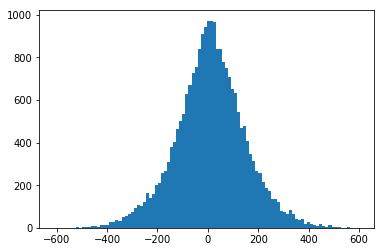

In [7]:
plt.hist(fuel_bought_used.FuelDifference,bins=100)
plt.show()

In [8]:
driver_fuel_bought_used = fuel_bought_used.groupby(['DriverID']).sum()

driver_fuel_bought_used.reset_index(inplace=True)
driver_fuel_bought_used.head()
driver_fuel_bought_used.shape

(795, 7)

In [10]:
from bokeh.plotting import figure, output_file, show, ColumnDataSource
from bokeh.io import output_notebook
from bokeh.models import HoverTool,PanTool, WheelZoomTool, BoxSelectTool

In [11]:
output_notebook()

Loading BokehJS ...

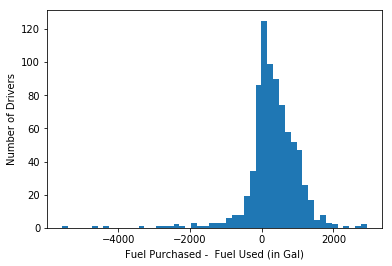

In [9]:
plt.hist(driver_fuel_bought_used.FuelDifference, bins=52)
plt.xlabel('Fuel Purchased -  Fuel Used (in Gal)')
plt.ylabel('Number of Drivers')
plt.show()

In [48]:
# from sklearn.preprocessing import OneHotEncoder
# enc = OneHotEncoder()


In [62]:
# label encoding
driver_fuel_bought_used.DriverID = driver_fuel_bought_used.DriverID.astype('category')
# driver_fuel_bought_used["D_ID"] = driver_fuel_bought_used["DriverID"].cat.codes
# driver_fuel_bought_used_cat = driver_fuel_bought_used.iloc['FuelDifference','TotalFuelBought','TotalFuelUsed']
# driver_fuel_bought_used_cat
driver_fuel_bought_used.dtypes


DriverID             category
Unnamed: 0              int64
Week                    int64
TotalFuelUsed         float64
TotalFuelBought       float64
FuelDifference        float64
FuelDifferencePct     float64
dtype: object

In [63]:
driver_fuel_bought_used["D_ID"] = driver_fuel_bought_used["DriverID"].cat.codes
driver_fuel_bought_used.head()

,DriverID,Unnamed: 0,Week,TotalFuelUsed,TotalFuelBought,FuelDifference,FuelDifferencePct,D_ID
0,ABBV,190,480,7904.2,7362.54,-541.66,57.850604,0
1,ADAG,306,186,3950.3,3940.34,-9.96,55.020626,1
2,ADAR,2907,1326,16884.6,17322.70,438.10,820.865275,2
3,ALBJ,1850,850,7726.4,8715.45,989.05,809.150940,3
4,ALBME,5043,1277,14267.1,15060.73,793.63,1112.149410,4


In [68]:
driver_fuel_bought_used_cat = driver_fuel_bought_used.filter(['Week','TotalFuelUsed','FuelDifference','D_ID'], axis=1)

driver_fuel_bought_used_cat.dtypes

Week                int64
TotalFuelUsed     float64
FuelDifference    float64
D_ID                int16
dtype: object

In [50]:
# enc.fit(driver_fuel_bought_used)

In [69]:
from sklearn.manifold import TSNE
model = TSNE(learning_rate = 75)
tsne_features = model.fit_transform(driver_fuel_bought_used_cat)
xs = tsne_features[:, 0]
ys = tsne_features[:, 1]

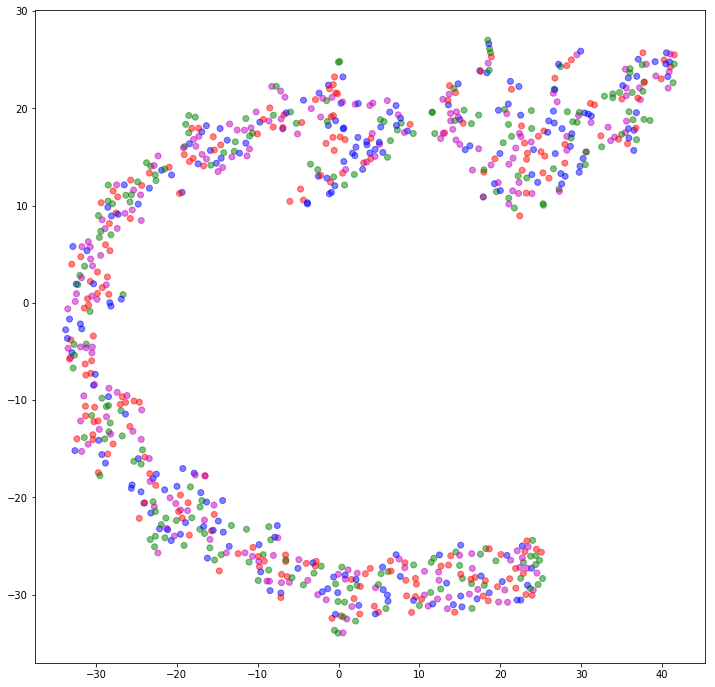

In [72]:
plt.figure(figsize=(12, 12))
plt.scatter(xs, ys, c = ['r', 'b', 'g', 'm'], alpha = 0.5)
# plt.scatter(xs, ys, c = ['r', 'b'], alpha = 0.5)